# Customer Churn Prediction Project

## 📦 Overview

In this project, I analyze a banking customer dataset to predict **customer churn**, whether a customer will leave the bank.

The goals of this project are to:
- Understand the key drivers of customer churn through exploratory data analysis (EDA)
- Apply feature engineering to improve predictive insights
- Train and compare multiple machine learning models, including:
    - Random Forest
    - Logistic Regression
    - Support Vector Machine (SVM)
    - K-Nearest Neighbors (KNN)
    - Gradient Boosting (GBM)
    - LightGBM
- Evaluate models using cross-validated F1 scores, accuracy, precision, and recall
- Identify the best-performing model for deployment or further refinement

This notebook is designed to provide a structured, end-to-end workflow demonstrating my ability to handle real-world, imbalanced classification problems — a valuable skill for roles in data analytics and financial modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv(r"D:\Projects\Churn Prediction\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 🔍 Dataset Overview

The dataset contains information about 10,000 bank customers, including personal, account, and demographic information. Our goal is to predict whether a customer will churn (leave the bank), indicated by the `Exited` column.

In [3]:
df = df.rename(columns={'Exited': 'Churned'})

In [4]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churned'],
      dtype='object')


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned


## 🔎 Data Quality Check

We confirmed that:
- There are no missing values ✅
- There are no duplicate entries ✅
- Data types are appropriate for modeling

This means we can move on directly to exploratory analysis without heavy cleaning.

## 📊 Churn Distribution

To understand the overall balance of classes, we visualized how many customers churned vs stayed. This is crucial because **imbalanced datasets** can bias models.

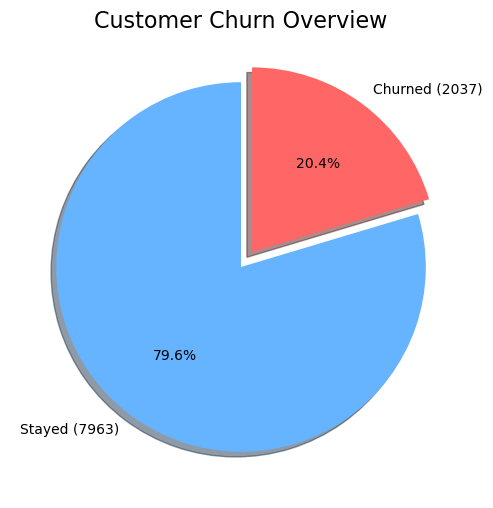

In [9]:
labels = ['Stayed', 'Churned']
sizes = df['Churned'].value_counts()
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=[f'{l} ({s})' for l, s in zip(labels, sizes)], autopct='%1.1f%%', startangle=90, colors=colors, explode=[0,0.1], shadow=True)
plt.title('Customer Churn Overview', fontsize=16)
plt.show()

📌 Roughly **20% of customers churned**, confirming the imbalance.

## 👤 Churn by Gender

This bar plot compares the number of churned and retained customers across genders.

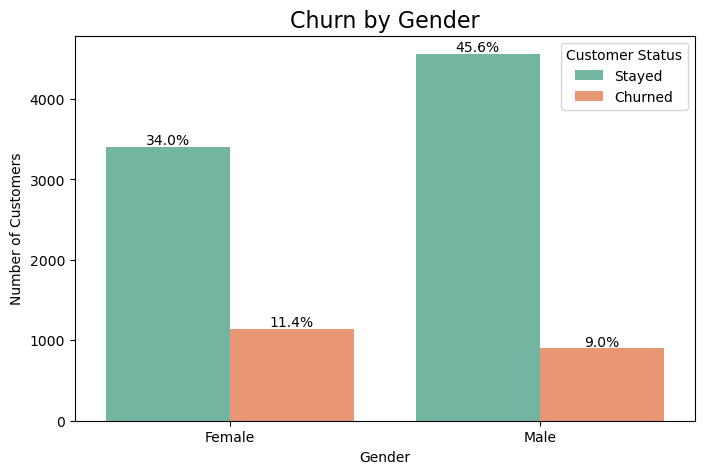

In [10]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Gender', hue='Churned', data=df, palette='Set2')
plt.title('Churn by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')

# Manually update legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Stayed', 'Churned'], title='Customer Status')

# Add percentages
total = df.shape[0]
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{100*height/total:.1f}%', (p.get_x()+p.get_width()/2., height+30), ha='center')

plt.show()


🔎 Insight:
- Slightly more **females** churned than males.
- However, **males still dominate** the overall customer base.

## 🎂 Age Distribution by Churn Status

This boxplot shows how customer age differs between churned and retained customers.

C:\Users\krris\AppData\Local\Temp\ipykernel_16440\998444193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churned', y='Age', data=df, palette='pastel')


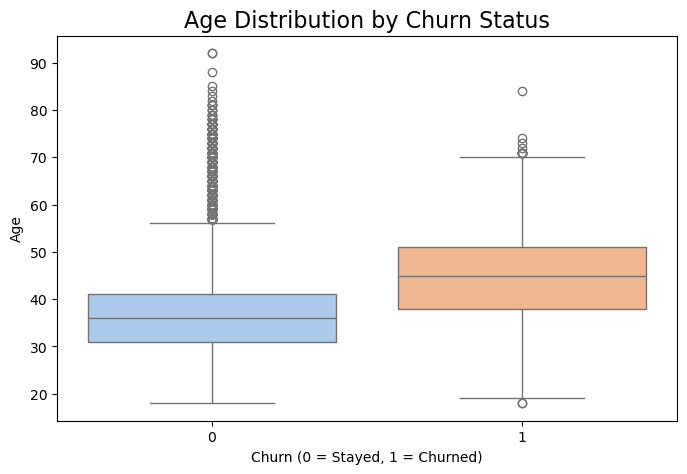

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churned', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Churn Status', fontsize=16)
plt.xlabel('Churn (0 = Stayed, 1 = Churned)')
plt.ylabel('Age')
plt.show()

🔎 Insight:
- Churned customers tend to be **older**, on average.
- Younger customers are more likely to stay.

## 🌍 Churn by Geography

We explored how geography impacts churn.

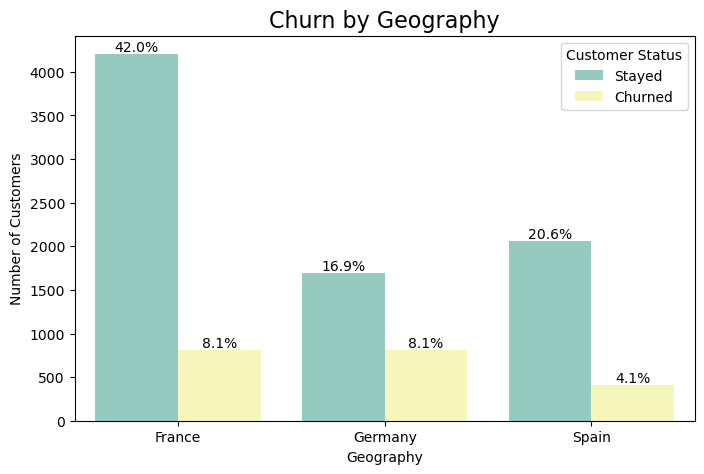

In [12]:
plt.figure(figsize=(8,5))
order = df['Geography'].value_counts().index
ax = sns.countplot(x='Geography', hue='Churned', data=df, order=order, palette='Set3')
plt.title('Churn by Geography', fontsize=16)
plt.xlabel('Geography')
plt.ylabel('Number of Customers')

# Manually update legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Stayed', 'Churned'], title='Customer Status')

# Add % again
total = df.shape[0]
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{100*height/total:.1f}%', (p.get_x()+p.get_width()/2., height+30), ha='center')

plt.show()

🔎 Insights:
- **France** has the largest customer base but relatively lower churn.
- **Germany** has a **higher churn rate**, suggesting regional differences in customer behavior.

## 🧮 Correlation Analysis

We plotted a correlation heatmap to identify linear relationships between features.

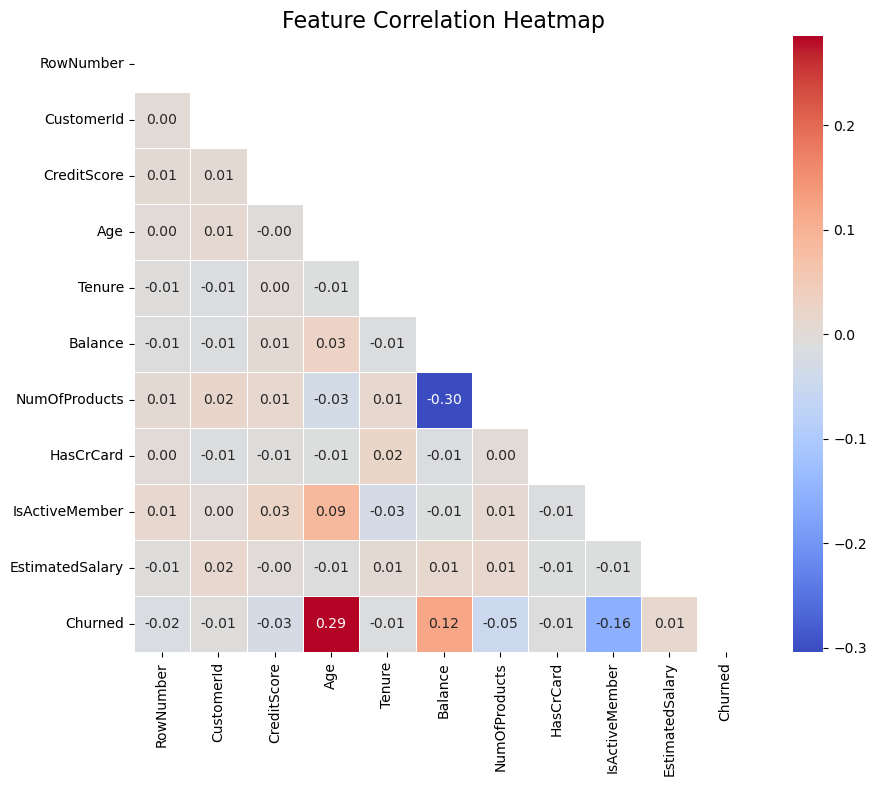

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(numeric_df.corr()))
sns.heatmap(numeric_df.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

🔎 Key Observations:
- No strong multicollinearity detected.
- **Age**, **Balance**, and **IsActiveMember** have noticeable (but small) correlations with churn.

## 🛠️ Encoding Categorical Variables

We applied:
- **Label Encoding** to `Gender` (binary)
- **One-Hot Encoding** to `Geography` (multi-class, drop first to avoid dummy trap)

This allows us to feed categorical features into machine learning models.

In [14]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churned', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [17]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Churned'], axis=1)
y = df['Churned']

In [18]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

## ✂️ Train-Test Split

We split the data:
- 80% for training
- 20% for testing

This ensures we have unseen data to evaluate the model's generalization performance.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## 📏 Feature Scaling

We applied **standardization** using `StandardScaler` to ensure features are on the same scale. This is particularly important for distance-based models (e.g., KNN, SVM).

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## 🌲 Random Forest Model (with Balanced Classes)

We trained a **Random Forest classifier** with:
- `class_weight='balanced'` to address class imbalance
- Cross-validation using **F1-score** as the main metric

✅ Random Forest often performs well on tabular data with mixed data types.

In [22]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)

In [23]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.60736196 0.6096423  0.68945022 0.62116992 0.60895522]
Mean F1 score:  0.6273159256197336


In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [25]:
y_pred = rf_model.predict(X_test)

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [27]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1423  184]
 [ 127  266]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.68      0.63       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000

0.8445


### 🧾 Evaluation: Random Forest

The confusion matrix, classification report, and accuracy score are printed below.

🔎 Key Metrics:
- F1 Score on test set: `~0.63`
- Recall: Fairly strong for the minority (churn) class
- Balanced performance overall

## 📊 Feature Importance (Random Forest)

This plot ranks features based on how useful they were in predicting churn.

🔎 Top Predictors:
- **Age**
- **NumOfProducts**
- **Balance**

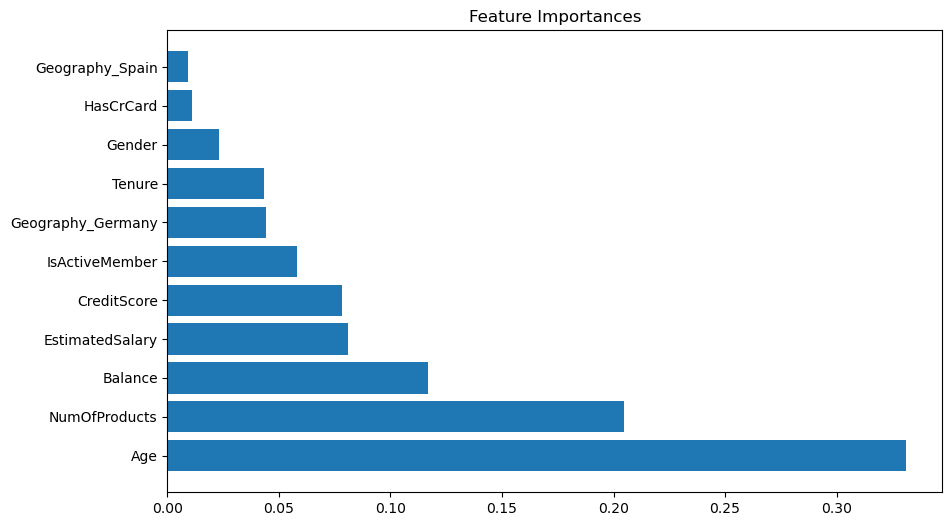

In [28]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

## 🧪 Logistic Regression

As a baseline linear model, Logistic Regression is useful for interpretability and benchmarking.

We again used `class_weight='balanced'` and evaluated with cross-validation and test metrics.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

In [31]:
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.46923879 0.51049724 0.51557465 0.48684211 0.48504983]
Mean F1 score:  0.49344052360778645


In [32]:
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
y_pred_log_reg_model = log_reg_model.predict(X_test)

In [34]:
conf_matrix_log_reg_model = confusion_matrix(y_test, y_pred_log_reg_model)
class_report_log_reg_model = classification_report(y_test, y_pred_log_reg_model)
accuracy_log_reg_model = accuracy_score(y_test, y_pred_log_reg_model)

In [35]:
print(conf_matrix_log_reg_model)
print(class_report_log_reg_model)
print(accuracy_log_reg_model)

[[1159  448]
 [ 113  280]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

0.7195


## 📈 Support Vector Machine (RBF Kernel)

We used an **RBF kernel** with class weighting for SVM, which is suitable for non-linear classification.

Note: SVMs are sensitive to feature scaling, which we’ve already addressed.

In [36]:
from sklearn.svm import SVC

In [37]:
svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    random_state=42
)

In [38]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.5836478  0.61381074 0.63515152 0.57997699 0.58      ]
Mean F1 score:  0.5985174081243818


In [39]:
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [40]:
y_pred_svm_model = svm_model.predict(X_test)

In [41]:
coef_matrix_svm_model = confusion_matrix(y_test, y_pred_svm_model)
class_report_svm_model = classification_report(y_test, y_pred_svm_model)
accuracy_svm_model = accuracy_score(y_test, y_pred_svm_model)

In [42]:
print(coef_matrix_svm_model)
print(class_report_svm_model)
print(accuracy_svm_model)

[[1277  330]
 [  99  294]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000

0.7855


## 👥 K-Nearest Neighbors

KNN is a simple, intuitive model based on distance metrics.

We evaluated performance using the same strategy — cross-validation and F1 scoring.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto'
)

In [45]:
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.44793713 0.42971888 0.46124031 0.48351648 0.45849802]
Mean F1 score:  0.45618216488841484


In [46]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_knn_model = knn_model.predict(X_test)

In [48]:
coef_matrix_knn_model = confusion_matrix(y_test, y_pred_knn_model)
class_report_knn_model = classification_report(y_test, y_pred_knn_model)
accuracy_knn_model = accuracy_score(y_test, y_pred_knn_model)

In [49]:
print(coef_matrix_knn_model)
print(class_report_knn_model)
print(accuracy_knn_model)

[[1514   93]
 [ 247  146]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000

0.83


## 🔥 Gradient Boosting (GBM)

We trained a GBM model, which builds trees sequentially and often outperforms RF in some structured datasets.

We used:
- 100 trees
- Depth of 3
- Learning rate of 0.1

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbm_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [69]:
cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.61100569 0.54223969 0.59590317 0.6031746  0.56262042]
Mean F1 score:  0.5829887142120089


In [70]:
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [71]:
y_pred_gbm_model = gbm_model.predict(X_test)

In [73]:
coef_matrix_gbmm_model = confusion_matrix(y_test, y_pred_gbm_model)
class_report_gbm_model = classification_report(y_test, y_pred_gbm_model)
accuracy_gbm_model = accuracy_score(y_test, y_pred_gbm_model)

In [74]:
print(coef_matrix_gbmm_model)
print(class_report_gbm_model)
print(accuracy_gbm_model)

[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8675


## ⚡ LightGBM

LightGBM is a faster, more efficient gradient boosting implementation, often ideal for large datasets.

We used similar parameters as GBM and included class balancing.

In [52]:
from lightgbm import LGBMClassifier

In [53]:
lgbm_model = LGBMClassifier(
    class_weight='balanced',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [54]:
cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring ='f1', n_jobs=-1)
print("Cross-validated F1 score: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))

Cross-validated F1 score:  [0.59574468 0.59343434 0.64137087 0.58891455 0.58145363]
Mean F1 score:  0.6001836154114495


In [55]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [56]:
y_pred_lgbm_model = lgbm_model.predict(X_test)

In [57]:
coef_matrix_lgbm_model = confusion_matrix(y_test, y_pred_lgbm_model)
class_report_lgbm_model = classification_report(y_test, y_pred_lgbm_model)
accuracy_lgbm_model = accuracy_score(y_test, y_pred_lgbm_model)

In [58]:
print(coef_matrix_lgbm_model)
print(class_report_lgbm_model)
print(accuracy_lgbm_model)

[[1299  308]
 [  82  311]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.79      0.61       393

    accuracy                           0.81      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.81      0.82      2000

0.805


## 🧪 Model Comparison: Test Set Performance

Below is a consolidated table of all models evaluated on the test set. Metrics include:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score** (primary metric)

In [ ]:
def get_metrics(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [76]:
results = []

results.append(get_metrics(rf_model, "Random Forest", X_test, y_test))
results.append(get_metrics(log_reg_model, "Logistic Regression", X_test, y_test))
results.append(get_metrics(svm_model, "SVM (RBF)", X_test, y_test))
results.append(get_metrics(knn_model, "KNN", X_test, y_test))
results.append(get_metrics(gbm_model, "Gradient Boosting", X_test, y_test))
results.append(get_metrics(lgbm_model, "LightGBM", X_test, y_test))

In [78]:
performance_df = pd.DataFrame(results)
performance_df = performance_df.sort_values(by='F1 Score', ascending=False)
performance_df.reset_index(drop=True, inplace=True)

print(performance_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest    0.8445   0.591111  0.676845  0.631079
1             LightGBM    0.8050   0.502423  0.791349  0.614625
2    Gradient Boosting    0.8675   0.750000  0.488550  0.591680
3            SVM (RBF)    0.7855   0.471154  0.748092  0.578171
4  Logistic Regression    0.7195   0.384615  0.712468  0.499554
5                  KNN    0.8300   0.610879  0.371501  0.462025


🔎 Insights:
- **Random Forest** achieved the best F1 Score
- **LightGBM** and **SVM** also performed well
- **Logistic Regression** offered decent recall, but low precision

We chose F1 score due to the **imbalance in the dataset**.

## ✅ Conclusion & Recommendations

📌 Summary:
- We trained 6 models and performed in-depth evaluation.
- **Random Forest** emerged as the top performer overall.
- PyCaret (notebook 2) confirmed our manual findings with automated tuning and comparisons.
- Class imbalance was a major challenge, handled using `class_weight='balanced'`.

🔮 Recommendations:
- Focus on older customers with high balances and multiple products.
- Implement churn prevention strategies in **Germany**, where churn is highest.

🚀 Next Steps:
- Add domain-specific features (e.g., tenure ratio, product interaction)
- Try threshold tuning to trade off precision vs recall
- Deploy the final model in a customer retention dashboard